In [5]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set basic parameters (easy to modify later for tuning)
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 32
EPOCHS = 5
LEARNING_RATE = 0.001
FILTER_SIZE = (3, 3)
DROPOUT_RATE = 0.5
OPTIMIZER_CHOICE = 'adam'  # options: 'adam' or 'rmsprop'

In [6]:
# Prepare the dataset (using ImageDataGenerator)
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'PlantVillage',  # <-- Just this folder, it will auto-detect classes
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'PlantVillage',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 33027 images belonging to 16 classes.
Found 8249 images belonging to 16 classes.


In [7]:
# Build the CNN model
def create_cnn(optimizer='adam', dropout_rate=0.5, filter_size=(3,3)):
    model = Sequential()
    
    model.add(Conv2D(32, filter_size, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(64, filter_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(128, filter_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(train_generator.num_classes, activation='softmax'))
    
    if optimizer == 'adam':
        opt = Adam(learning_rate=LEARNING_RATE)
    else:
        opt = RMSprop(learning_rate=LEARNING_RATE)
        
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the model
model = create_cnn(optimizer=OPTIMIZER_CHOICE, dropout_rate=DROPOUT_RATE, filter_size=FILTER_SIZE)

# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=100,
    validation_data=validation_generator,
    validation_steps=50
)

# Save the model
model.save('cnn_image_classifier.h5')

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 330ms/step - accuracy: 0.4721 - loss: 2.1871 - val_accuracy: 0.5156 - val_loss: 1.9336
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 310ms/step - accuracy: 0.5040 - loss: 1.9844 - val_accuracy: 0.5075 - val_loss: 1.8856
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 304ms/step - accuracy: 0.4734 - loss: 1.9208 - val_accuracy: 0.5063 - val_loss: 1.9160
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 249ms/step - accuracy: 0.5131 - loss: 1.7237 - val_accuracy: 0.4944 - val_loss: 1.8228
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 194ms/step - accuracy: 0.4694 - loss: 1.7278 - val_accuracy: 0.5156 - val_loss: 1.6592


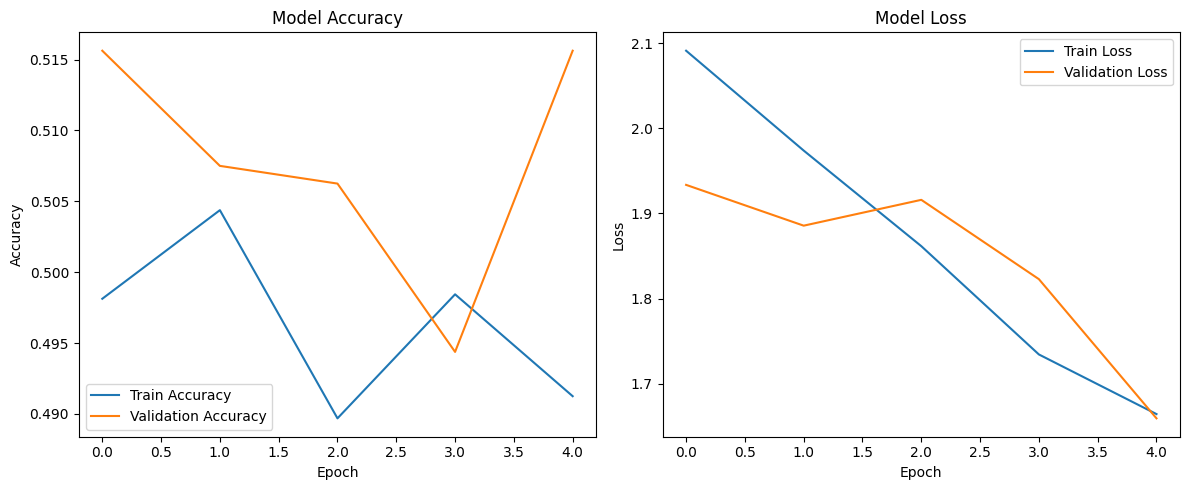

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()